In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Split the Data to a train and test set
* Use the index method to implement the splitting. This will work since we are not deleting any of the rows in the dataset. LATER
* Do stratified sampling using the "median_income" attribute.
    - No stratium smaller than 1000 instances

<AxesSubplot:>

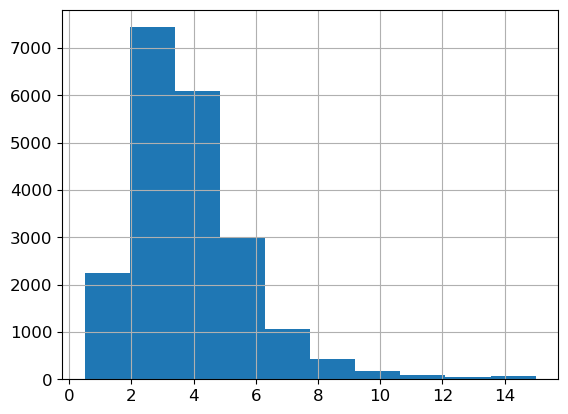

In [7]:
median_income = housing['median_income']
median_income.hist()

In [8]:
median_income
cuts = [0, 1.5, 3, 4.5, 6, np.inf]
labels = ['low', 'low_middle', 'middle', 'high_middle', 'high']
income_cat = pd.cut(median_income, bins=cuts, labels=labels)
housing['income_cat'] = income_cat
income_cat.value_counts()

middle         7236
low_middle     6581
high_middle    3639
high           2362
low             822
Name: median_income, dtype: int64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
split = StratifiedShuffleSplit(test_size=0.2, random_state=42, n_splits=1)

In [11]:
count = 0
for train_INDEX, test_INDEX in split.split(housing, housing['income_cat']):
    train = housing.iloc[train_INDEX]
    test = housing.iloc[test_INDEX]    


In [12]:
train['income_cat'].value_counts() / train['income_cat'].count()

middle         0.350594
low_middle     0.318859
high_middle    0.176296
high           0.114462
low            0.039789
Name: income_cat, dtype: float64

In [13]:
test['income_cat'].value_counts() / test['income_cat'].count()

middle         0.350533
low_middle     0.318798
high_middle    0.176357
high           0.114341
low            0.039971
Name: income_cat, dtype: float64

In [14]:
# housing_tr = train.copy()
train.corr()['median_house_value']

longitude            -0.048777
latitude             -0.142688
housing_median_age    0.107546
total_rooms           0.138048
total_bedrooms        0.053043
population           -0.022016
households            0.069638
median_income         0.689630
median_house_value    1.000000
Name: median_house_value, dtype: float64

* Visualize relationships between keys variables

* Create a pipeline

* Train models and see their parameters

* 

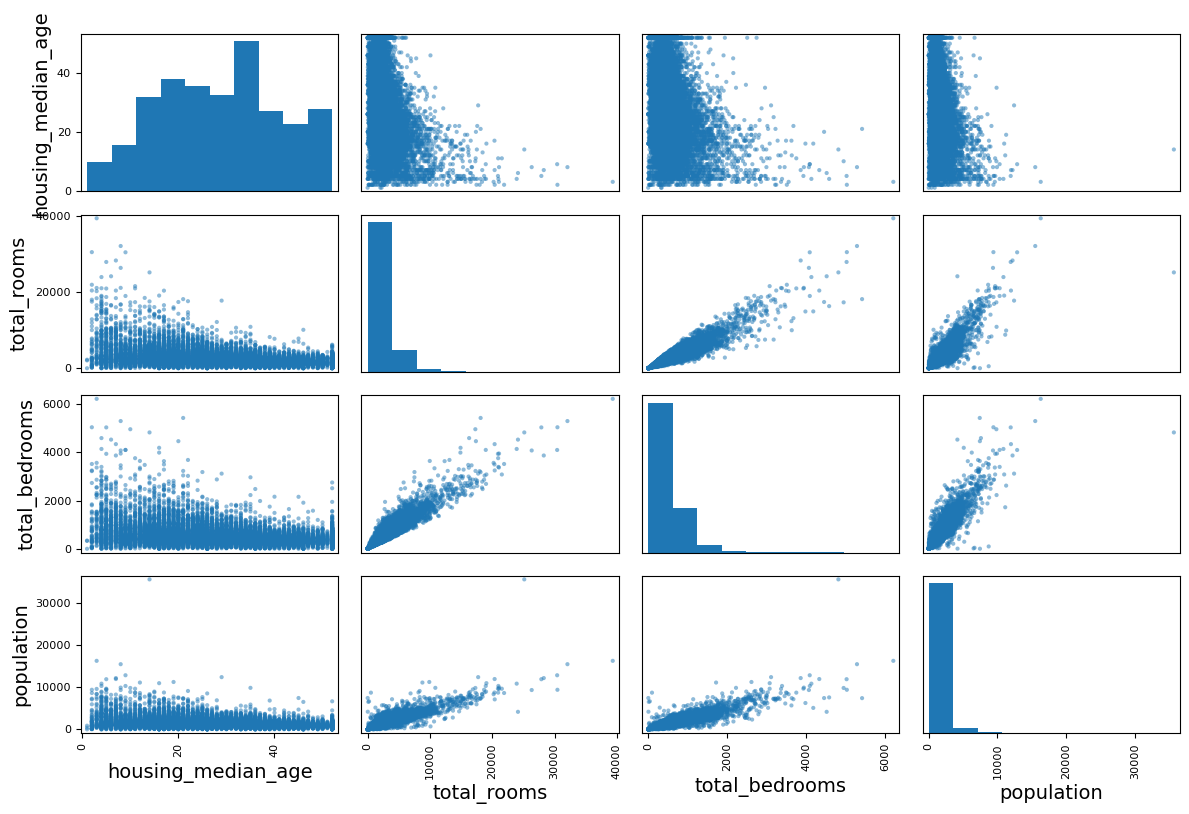

In [15]:
from pandas.plotting import scatter_matrix

key_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population']#, 'households', 'median_income', 'median_house_value']
scatter_matrix(train[key_variables], figsize=(12, 8))
plt.tight_layout()

In [16]:
X = train.drop(columns=['median_house_value', 'income_cat'])
y = train['median_house_value']

In [17]:
X_num = X.drop(columns=['ocean_proximity'])

In [18]:
from sklearn.impute import SimpleImputer

# shouldn't be fitted
smpl_impute = SimpleImputer(strategy='median')

In [19]:
# look at the parameters (medians) calculated in a simple imputer

smpl_impute_temp = SimpleImputer(strategy='median')
smpl_impute_temp = smpl_impute_temp.fit(X_num)
print("Median of each of the columns:\n")
smpl_impute_temp.statistics_

Median of each of the columns:



array([-118.51  ,   34.26  ,   29.    , 2115.    ,  432.    , 1162.    ,
        408.    ,    3.5333])

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

std_sclr = StandardScaler()
ohe = OneHotEncoder()

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17676 to 15821
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16340 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = 3
bedrooms_ix = 4
population_ix = 5
households_ix = 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit (self, X, y=None):
        return self # nothing else to do 
    
    def transform (self, X, y=None):
        rooms_per_household = X[ : , rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

In [23]:
combined_attribute_transformer = CombinedAttributesAdder(True)


In [24]:
from sklearn.pipeline import Pipeline

num_pipline = Pipeline([
    ('impute', smpl_impute), 
    ('standard', std_sclr),
    ('combined_attr', combined_attribute_transformer),
    # (),
])

cat_pipeline = Pipeline([
    ('ohe', ohe)
])

In [25]:
from sklearn.compose import ColumnTransformer

num_cols = X_num.columns.values
cat_cols = ['ocean_proximity']

pipeline = ColumnTransformer([
    ('numerical', num_pipline, num_cols),
    ('categorical', cat_pipeline, cat_cols),
])

In [26]:
X_prepared = pipeline.fit_transform(X)

In [27]:
X_prepared.shape

(16512, 16)

### Start experimenting with ML models

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_prepared, y)


In [30]:
model.coef_

array([-5.03749665e+04, -5.09314238e+04,  1.37483123e+04, -1.06035140e+04,
        3.15231321e+04, -4.21981528e+04,  2.68949310e+04,  7.38664978e+04,
       -3.60569294e+01,  3.71328392e+00,  3.60674932e-01, -2.70385116e+04,
       -6.82618181e+04,  1.47765700e+05, -3.15954135e+04, -2.08699564e+04])

In [50]:
from sklearn.svm import SVR

svr = SVR()
X_prepared = pipeline.fit_transform(X)

# svr = svr.fit(X_prepared, y)
# y_hat = svr.predict(X_prepared)


In [41]:
from sklearn.metrics import mean_squared_error

# rmse of unregularized SVR model on the training set
score = np.sqrt(mean_squared_error(y, y_hat))
score

118230.54724178636

In [51]:
from sklearn.model_selection import cross_val_score

# rmse of unregularized SVR model on the validation sets using 10-fold CV
utility_function = 'neg_mean_squared_error'
scores = cross_val_score(svr, X_prepared, y, scoring=utility_function, cv=5)

In [53]:
def display_scores(scores):
    print(scores)
    print('mean: ', scores.mean())
    print('standard deviation: ', scores.std())

display_scores(np.sqrt(-scores))

[122114.43346695 118246.97674782 117940.72057492 115316.97593197
 117545.31556804]
mean:  118232.88445793802
standard deviation:  2196.690899815793


### Scores analysis
Since the model that was trained on the entire training set and the models trained using cross validation had similar rmse scores, we can conclude:
* The SVR model did not over fit the data
* We won't get much better performance when we tune hyper parameters

## Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

# model
sprt_vctr = SVR()

# hyperparameters to try
params = [
    {'gamma':['auto', 'scale'], 'C':[0.1, 1, 10]},
    {'kernel':['linear'], 'C':[0.1, 1]},
]

utility_function = 'neg_mean_squared_error'

grid_search = GridSearchCV(sprt_vctr, params, scoring=utility_function, cv=3, return_train_score=True)

X_prepared = pipeline.fit_transform(X)
grid_search.fit(X_prepared, y)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10], 'gamma': ['auto', 'scale']},
                         {'C': [0.1, 1], 'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# has the results and parameters of all the 8 * cv models we trained
dir(grid_search)

In [61]:
# the actual model that has performed best
grid_search.best_estimator_

# lr = LinearRegression()
# lr.fit(X_prepared) 

SVR(C=1, kernel='linear')

In [ ]:
dir(grid_search.best_estimator_)

In [ ]:
curves = grid_search.cv_results_
curves.keys()

In [75]:
curves = grid_search.cv_results_
for neg_mse, params in zip(curves['mean_test_score'], curves['params']):
    print("{:.0f}".format(np.sqrt(-neg_mse)), " ", params)


118213   {'C': 0.1, 'gamma': 'auto'}
118227   {'C': 0.1, 'gamma': 'scale'}
118072   {'C': 1, 'gamma': 'auto'}
118227   {'C': 1, 'gamma': 'scale'}
116687   {'C': 10, 'gamma': 'auto'}
118227   {'C': 10, 'gamma': 'scale'}
117703   {'C': 0.1, 'kernel': 'linear'}
113300   {'C': 1, 'kernel': 'linear'}


In [78]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameters to try
params = [
    {'gamma':['auto', 'scale'], 'C':[0.1, 1, 10]},
    {'kernel':['linear'], 'C':[0.1, 1, 10, 100, 1000, 10000]},
]

rdm_grid_search = RandomizedSearchCV(sprt_vctr, params, cv=3, scoring=utility_function, return_train_score=True)
rdm_grid_search.fit(X_prepared, y)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions=[{'C': [0.1, 1, 10],
                                         'gamma': ['auto', 'scale']},
                                        {'C': [0.1, 1, 10, 100],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

We were able to get much better results when using the randomized grid search because we got to try a bigger range of values for the same computation time.

In [84]:
curves = rdm_grid_search.cv_results_
for loss, params in zip(curves['mean_test_score'], curves['params']):
    print(np.sqrt(-loss), ' ', params)

118212.61720422517   {'gamma': 'auto', 'C': 0.1}
118226.93664637684   {'gamma': 'scale', 'C': 0.1}
118071.8886377704   {'gamma': 'auto', 'C': 1}
118226.92698022026   {'gamma': 'scale', 'C': 1}
116686.59457182321   {'gamma': 'auto', 'C': 10}
118226.83031977704   {'gamma': 'scale', 'C': 10}
117703.20030916891   {'kernel': 'linear', 'C': 0.1}
113299.75984374664   {'kernel': 'linear', 'C': 1}
86463.4948327602   {'kernel': 'linear', 'C': 10}
71584.09559743159   {'kernel': 'linear', 'C': 100}


In [89]:
# a pipeline that preprocesses incoming X data and predicts labels

# ml model
optl_svr = rdm_grid_search.best_estimator_

pipeline_predict = Pipeline([
    ('preprocessing', pipeline),
    ('predict', optl_svr),
])

# fit pipeline with full training data (training & validation datasets)
pipeline_predict.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler()),
                                                                  ('combined_attr',
                                                                   CombinedAttributesAdder())]),
                                                  array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('predict', SVR(C=100, kernel='linear'))])

In [87]:
X_test = test.drop(columns='median_house_value')
y_test = test['median_house_value'].copy()

y_hat = pipeline_predict.transform(X_test)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.